In [2]:
import cellular_automata as ca
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [8]:
def simulate_tumor_growth(time_delay, generations, rows, cols, phi, rho, k1, k2, k3, k4, cancer_init_positions, origin):
    history = {}
    M = ca.initialize_grid(rows, cols, cancer_init_positions)
    M_cluster = []

    for g in range(generations):
        M = ca.simulate_tumor_growth_one_step(M, g, time_delay, history, phi, rho, k1, k2, k3, k4, origin, rows, cols)

        M_cluster.append(M)

    return history, M_cluster




In [377]:
GENERATIONS = 500
ROWS = COLS = 101
ORIGIN = (COLS // 2, ROWS // 2)
PHI = 1000
CANCER_INIT_POSITIONS = [(ORIGIN[0], ORIGIN[1]), (ORIGIN[0] + 1, ORIGIN[1]), 
                         (ORIGIN[0] - 1, ORIGIN[1]), (ORIGIN[0], ORIGIN[1] - 1), 
                         (ORIGIN[0], ORIGIN[1] + 1)]
K1, K2, K3, K4 = 0.74, 0.2, 0.4, 0.4
RHO = 3.85

TIME_DELAY = 38
NO_TIME_DELAY = 0

In [10]:
def find_clusters(grid): 
    visited = np.zeros_like(grid, dtype=bool)
    clusters = []

    for r in range(ROWS):
        for c in range(COLS):
            if grid[r, c] == 'C' and not visited[r, c]:
                cluster = set()
                stack = [(r, c)]

                while stack:
                    current_r, current_c = stack.pop()
                    if 0 <= current_r < ROWS and 0 <= current_c < COLS and grid[current_r, current_c] == 'C' and not visited[current_r, current_c]:
                        visited[current_r, current_c] = True
                        cluster.add((current_r, current_c))
                        stack.extend([(current_r + dr, current_c + dc) for dr, dc in [(-1, 0), (1, 0), (0, -1), (0, 1)]])

                if cluster:
                    clusters.append(cluster)

    return clusters

In [379]:
history_no_delay, M_no_delay = simulate_tumor_growth(NO_TIME_DELAY, GENERATIONS, ROWS, COLS, PHI, RHO, K1, K2, K3, K4, CANCER_INIT_POSITIONS, ORIGIN)



In [380]:
# time delay = 7
history_delay, M_delay = simulate_tumor_growth(TIME_DELAY, GENERATIONS, ROWS, COLS, PHI, RHO, K1, K2, K3, K4, CANCER_INIT_POSITIONS, ORIGIN)

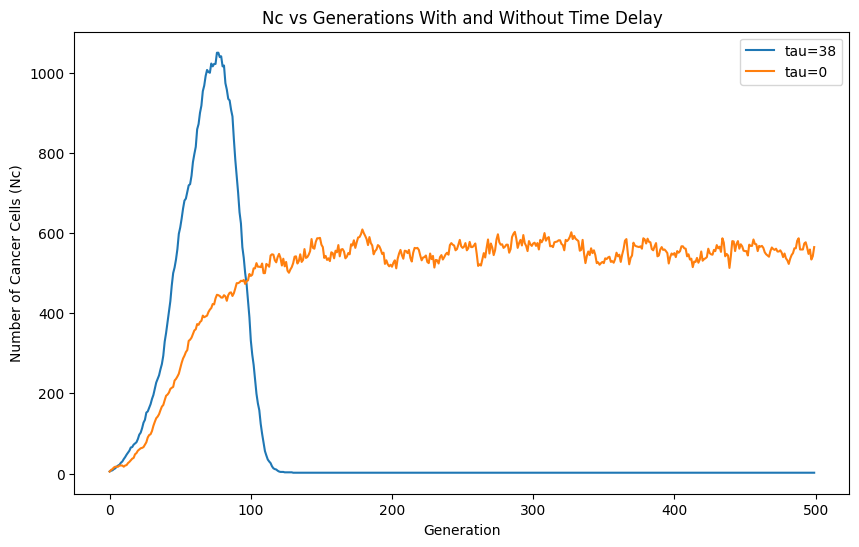

In [381]:
generations = list(range(GENERATIONS))
Nc_with_delay = [history_delay[g]['Nc'] for g in generations]
Nc_without_delay = [history_no_delay[g]['Nc'] for g in generations]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(generations, Nc_with_delay, label=f'tau={TIME_DELAY}')
plt.plot(generations, Nc_without_delay, label=f'tau={NO_TIME_DELAY}')
plt.xlabel('Generation')
plt.ylabel('Number of Cancer Cells (Nc)')
plt.title('Nc vs Generations With and Without Time Delay')
plt.legend()
plt.show()


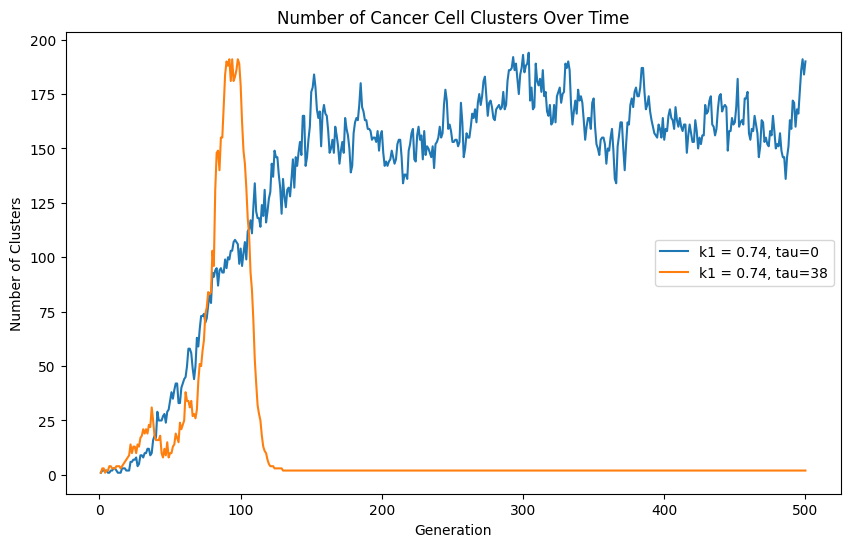

In [382]:

cluster_counts_k1_nodelay = []
cluster_counts_k1_delay = []

clusters_list_nodelay = []
for M in M_no_delay:
    clusters = find_clusters(M)
    clusters_list_nodelay.append(clusters)
    cluster_counts_k1_nodelay.append(len(clusters))

clusters_list_delay = []
for M in M_delay:
    clusters = find_clusters(M)
    clusters_list_delay.append(clusters)
    cluster_counts_k1_delay.append(len(clusters))

plt.figure(figsize=(10, 6))
plt.plot(range(1, GENERATIONS + 1), cluster_counts_k1_delay, label=f'k1 = 0.74, tau={TIME_DELAY}', linestyle='-')
plt.plot(range(1, GENERATIONS + 1), cluster_counts_k1_nodelay, label=f'k1 = 0.74, tau={NO_TIME_DELAY}', linestyle='-')
plt.title('Number of Cancer Cell Clusters Over Time')
plt.xlabel('Generation')
plt.ylabel('Number of Clusters')
plt.legend()
plt.show()

[[1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 3, 3, 2, 2, 2, 2, 2, 3, 5, 4, 3, 3, 7, 6, 7, 6, 9, 8, 10, 9, 12, 12, 12, 8, 12, 18, 22, 19, 17, 19, 31, 38, 28, 24, 30, 27, 32, 26, 36, 38, 42, 43, 33, 30, 36, 45, 50, 52, 55, 64, 68, 72, 64, 68, 71, 66, 70, 79, 80, 83, 80, 87, 76, 85, 89, 101, 107, 103, 106, 92, 85, 90, 93, 92, 96, 116, 110, 116, 108, 102, 112, 105, 107, 120, 122, 122, 125, 122, 114, 120, 119, 122, 132, 124, 128, 129, 139, 127, 139, 133, 134, 134, 135, 130, 138, 140, 154, 142, 144, 149, 154, 158, 147, 150, 150, 153, 146, 146, 157, 147, 149, 148, 154, 160, 169, 170, 167, 158, 159, 169, 164, 156, 148, 150, 140, 147, 162, 154, 160, 166, 166, 166, 163, 165, 160, 168, 172, 172, 176, 181, 188, 183, 180, 178, 174, 180, 184, 191, 186, 188, 174, 170, 177, 174, 174, 175, 175, 173, 157, 151, 142, 150, 151, 157, 159, 158, 170, 170, 166, 165, 182, 179, 180, 173, 175, 168, 181, 190, 177, 168, 167, 183, 181, 185, 182, 181, 195, 202, 182, 189, 194, 198, 190, 181, 193, 189, 189, 182, 193, 197, 195

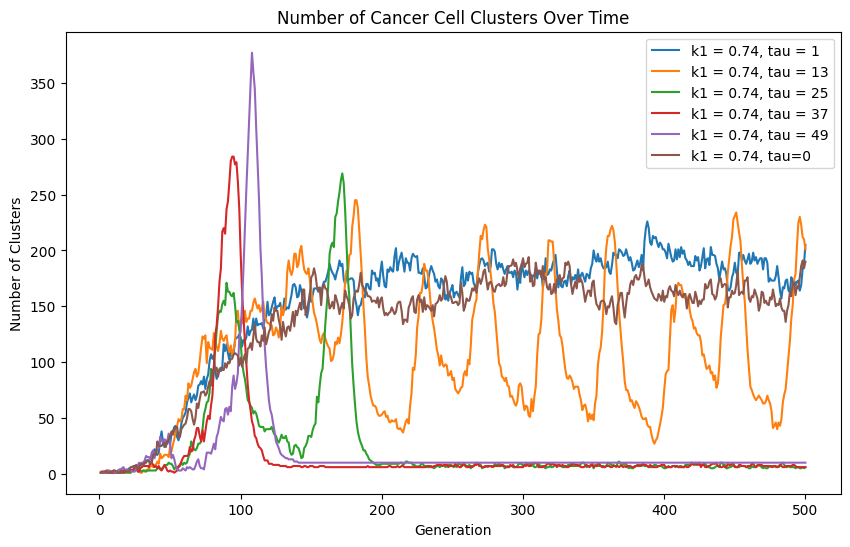

In [387]:
#Different time delay with one k1 value (k1=0.74)

tau_histories = []
tau_clusters = []

for tau in range(1, 50, 12):
    history, Ms = simulate_tumor_growth(tau, GENERATIONS, ROWS, COLS, PHI, RHO, K1, K2, K3, K4, CANCER_INIT_POSITIONS, ORIGIN)
    tau_histories.append(history)
    
    indiv_clusters = [len(find_clusters(M)) for M in Ms]
    tau_clusters.append(indiv_clusters)

print(tau_clusters)
# Plotting
taus = list(range(1, 50, 12))
palette = sns.color_palette('rocket_r', len(taus))

plt.figure(figsize=(10, 6))

for i, tau_cluster_data in enumerate(tau_clusters):
    plt.plot(range(1, GENERATIONS + 1), tau_cluster_data, label=f'k1 = 0.74, tau = {taus[i]}', linestyle='solid')

plt.plot(range(1, GENERATIONS + 1), cluster_counts_k1_nodelay, label=f'k1 = 0.74, tau={NO_TIME_DELAY}', linestyle='dotted', color='black')
plt.title('Number of Cancer Cell Clusters Over Time')
plt.xlabel('Generation')
plt.ylabel('Number of Clusters')
plt.legend()
plt.show()



In [ ]:
#Different k1s

In [1]:
GENERATIONS = 500
ROWS = COLS = 101
ORIGIN = (COLS // 2, ROWS // 2)
PHI = 1000
CANCER_INIT_POSITIONS = [(ORIGIN[0], ORIGIN[1]), (ORIGIN[0] + 1, ORIGIN[1]), 
                         (ORIGIN[0] - 1, ORIGIN[1]), (ORIGIN[0], ORIGIN[1] - 1), 
                         (ORIGIN[0], ORIGIN[1] + 1)]
K2, K3, K4 = 0.2, 0.4, 0.4
RHO = 3.85

TIME_DELAY = 50
NO_TIME_DELAY = 0

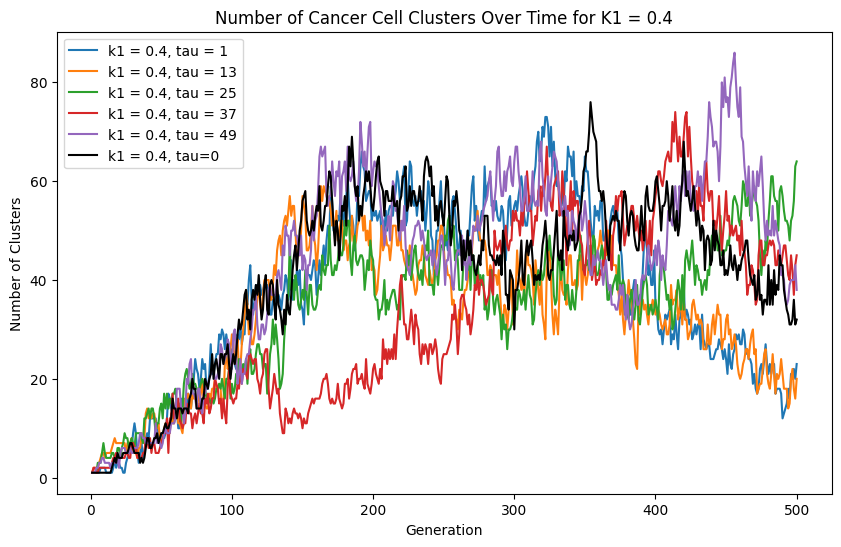

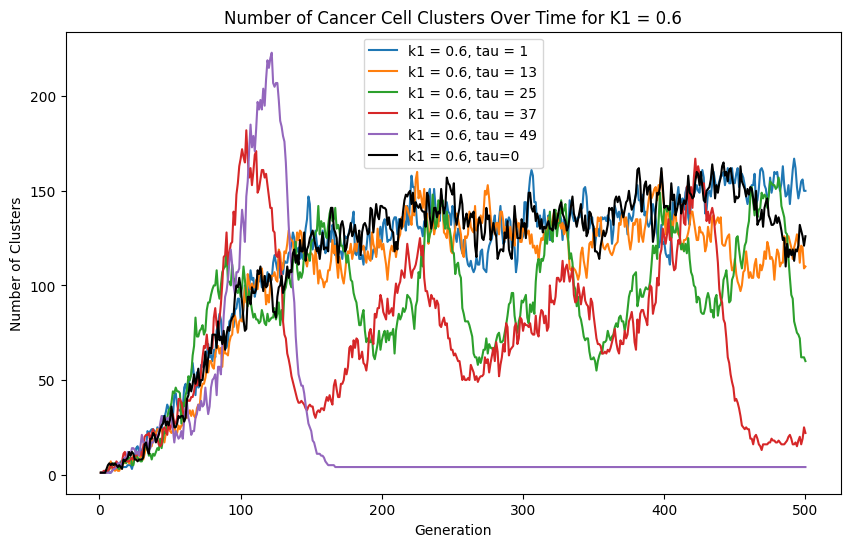

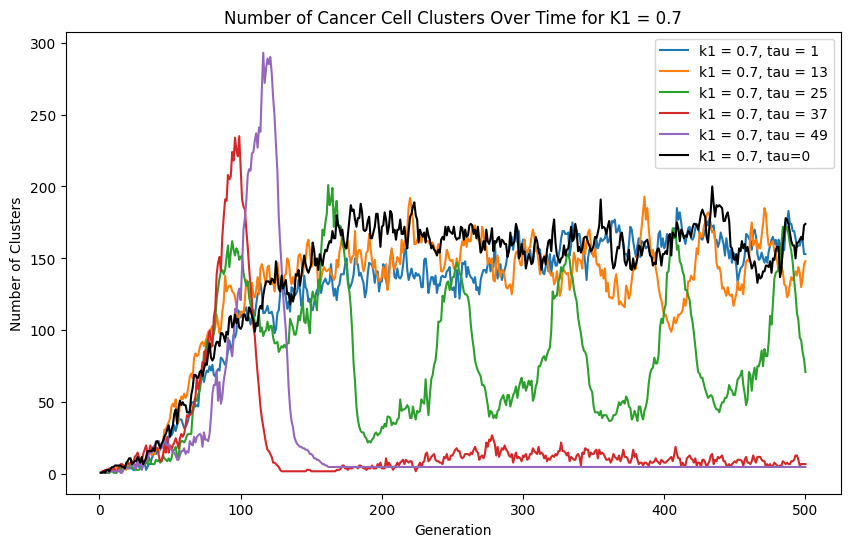

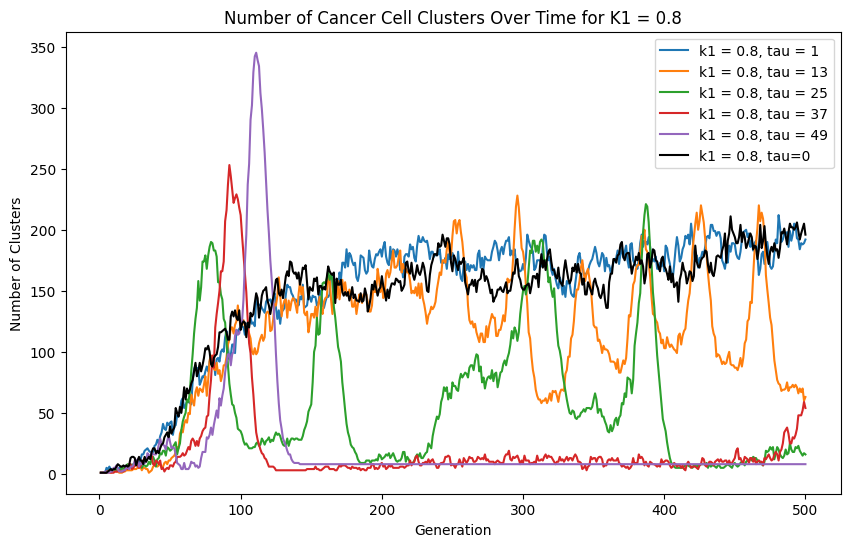

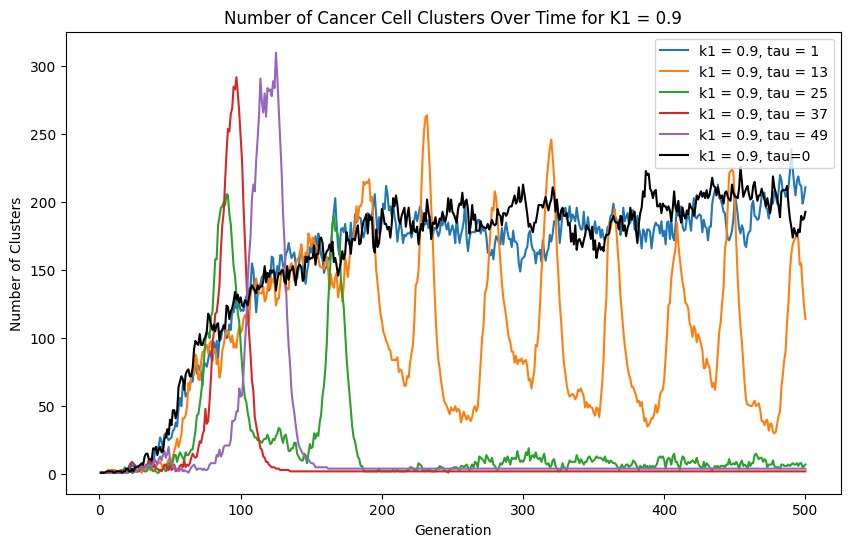

In [11]:
# Different K1 values and tau values - Metastatis: k1>0.4 and K2=0.4. Not yet within the gray area.

K1_values = [0.4, 0.6, 0.7, 0.8, 0.9]
tau_values = range(1, 50, 12)



for K1 in K1_values:
    tau_clusters_data = []

    for tau in tau_values:
        history, Ms = simulate_tumor_growth(tau, GENERATIONS, ROWS, COLS, PHI, RHO, K1, K2, K3, K4, CANCER_INIT_POSITIONS, ORIGIN)
        indiv_clusters = [len(find_clusters(M)) for M in Ms]
        tau_clusters_data.append(indiv_clusters)

    history_no_delay, M_no_delay = simulate_tumor_growth(NO_TIME_DELAY, GENERATIONS, ROWS, COLS, PHI, RHO, K1, K2, K3, K4, CANCER_INIT_POSITIONS, ORIGIN)
    clusters_list_nodelay_tau = []
    cluster_counts_k1_nodelay_taus = []
    for m in M_no_delay:
        clusters = find_clusters(m)
        clusters_list_nodelay_tau.append(clusters)
        cluster_counts_k1_nodelay_taus.append(len(clusters))

    # Plotting
    plt.figure(figsize=(10, 6))
    taus = list(range(1, 50, 12))

    for i, tau_cluster in enumerate(tau_clusters_data):
        plt.plot(range(1, GENERATIONS + 1), tau_cluster, label=f'k1 = {K1}, tau = {taus[i]}', linestyle='solid')
    
    plt.plot(range(1, GENERATIONS + 1), cluster_counts_k1_nodelay_taus, label=f'k1 = {K1}, tau={NO_TIME_DELAY}', linestyle='solid', color='black')

    
    plt.title(f'Number of Cancer Cell Clusters Over Time for K1 = {K1}')
    plt.xlabel('Generation')
    plt.ylabel('Number of Clusters')
    plt.legend()
    plt.show()   




In [ ]:
#Metastasis
# Different K1, K2 values and tau values - Metastatis:  From boundary region to inside grey region
# As pairs: (k1, k2) = (k1>0.40, k2=0.25), (k1>0.46, k2=0,3), (k1>0.5, k2=0.35), (k1>0.57, k2=0.4)



In [28]:
K1_values_a= np.linspace(0.47, 0.9 , num=5)
K2 = 0.3
tau_values = np.linspace(1, 300, 5)

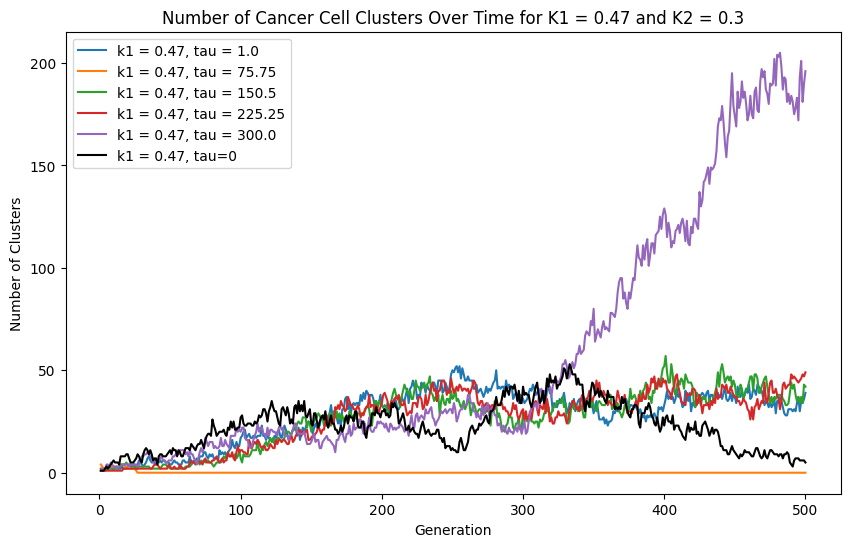

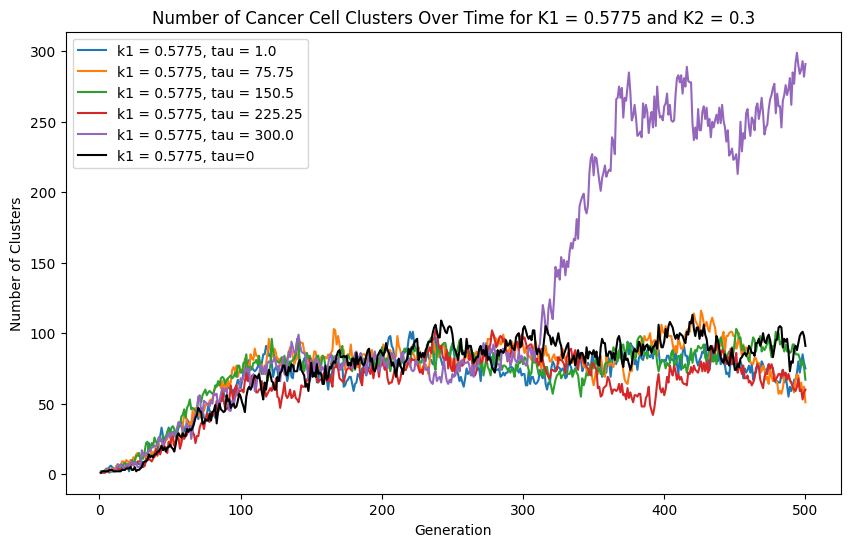

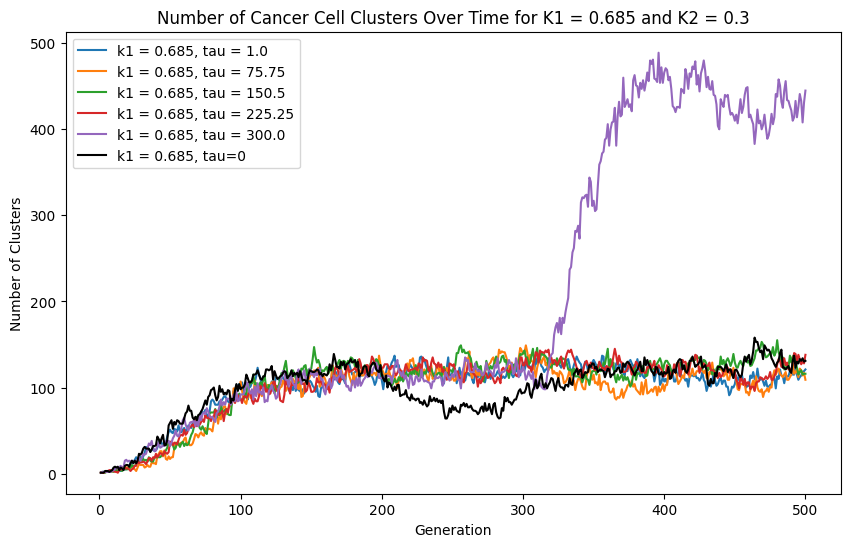

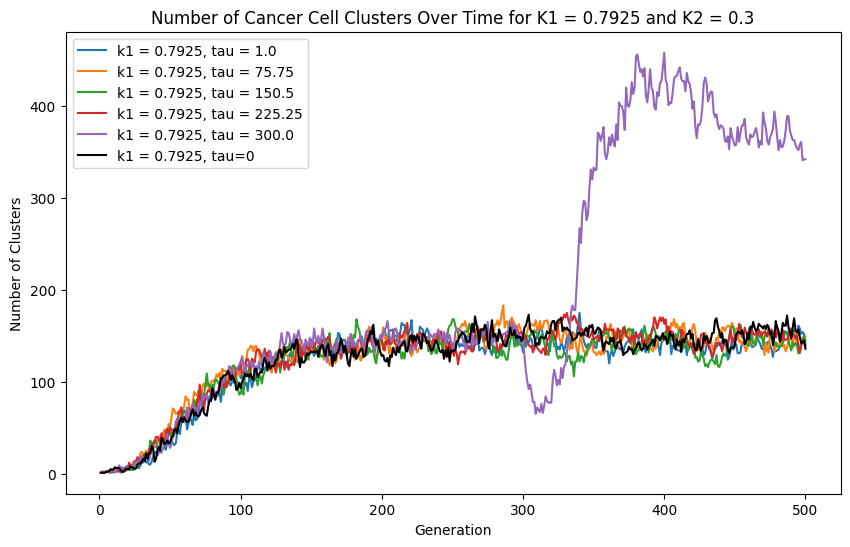

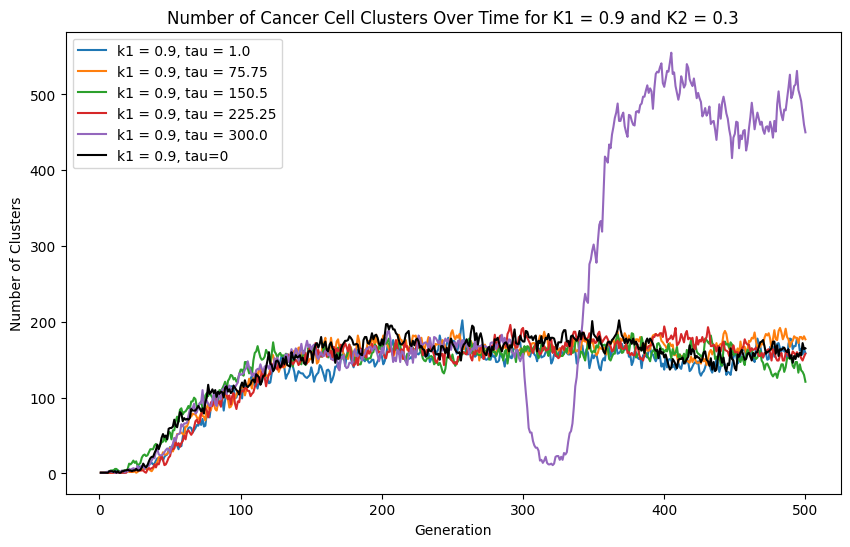

In [31]:
for K1 in K1_values_a:
    tau_clusters_data = []

    for tau in tau_values:
        history, Ms = simulate_tumor_growth(tau, GENERATIONS, ROWS, COLS, PHI, RHO, K1, K2, K3, K4, CANCER_INIT_POSITIONS, ORIGIN)
        indiv_clusters = [len(find_clusters(M)) for M in Ms]
        tau_clusters_data.append(indiv_clusters)

    history_no_delay, M_no_delay = simulate_tumor_growth(NO_TIME_DELAY, GENERATIONS, ROWS, COLS, PHI, RHO, K1, K2, K3, K4, CANCER_INIT_POSITIONS, ORIGIN)
    clusters_list_nodelay_tau = []
    cluster_counts_k1_nodelay_taus = []
    for m in M_no_delay:
        clusters = find_clusters(m)
        clusters_list_nodelay_tau.append(clusters)
        cluster_counts_k1_nodelay_taus.append(len(clusters))

    # Plotting
    plt.figure(figsize=(10, 6))
    taus = list(np.linspace(1, 300, 5))

    for i, tau_cluster in enumerate(tau_clusters_data):
        plt.plot(range(1, GENERATIONS + 1), tau_cluster, label=f'k1 = {K1}, tau = {taus[i]}', linestyle='solid')
    
    plt.plot(range(1, GENERATIONS + 1), cluster_counts_k1_nodelay_taus, label=f'k1 = {K1}, tau={NO_TIME_DELAY}', linestyle='solid', color='black')

    
    plt.title(f'Number of Cancer Cell Clusters Over Time for K1 = {K1} and K2 = {K2}')
    plt.xlabel('Generation')
    plt.ylabel('Number of Clusters')
    plt.legend()
    plt.show() 

In [72]:
#Try phase transition with k1>0.40 k = 0.25 for different tau

K1_values= [0.25, 0.35, 0.45, 0.55, 0.65, 0.85]
K2 = 0.25


TIME_DELAY = 50
NO_TIME_DELAY = 0

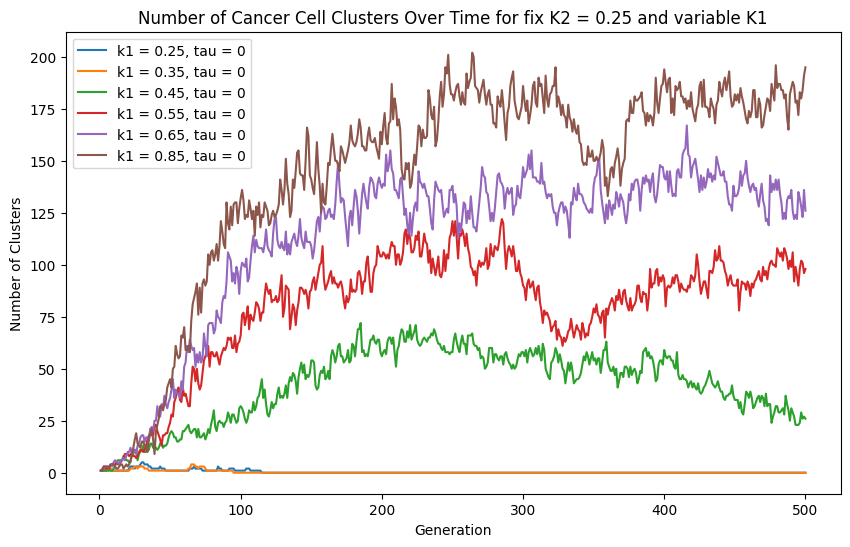

In [65]:
K1_clusters_data = []
K1_history_data = []
for K1 in K1_values:
    history, Ms = ca.simulate_tumor_growth_with_clusters(NO_TIME_DELAY, GENERATIONS, ROWS, COLS, PHI, RHO, K1, K2, K3, K4, CANCER_INIT_POSITIONS, ORIGIN)
    indiv_clusters = [len(ca. find_clusters(M,ROWS,COLS)) for M in Ms]
    K1_clusters_data.append(indiv_clusters)

    K1_history_data.append(history)

    # Plotting
plt.figure(figsize=(10, 6))
taus = list([0])

for i, tau_cluster in enumerate(K1_clusters_data):
    plt.plot(range(1, GENERATIONS + 1), tau_cluster, label=f'k1 = {K1_values[i]}, tau = {NO_TIME_DELAY}', linestyle='solid')


plt.title(f'Number of Cancer Cell Clusters Over Time for fix K2 = {K2} and variable K1')
plt.xlabel('Generation')
plt.ylabel('Number of Clusters')
plt.legend()
plt.show() 

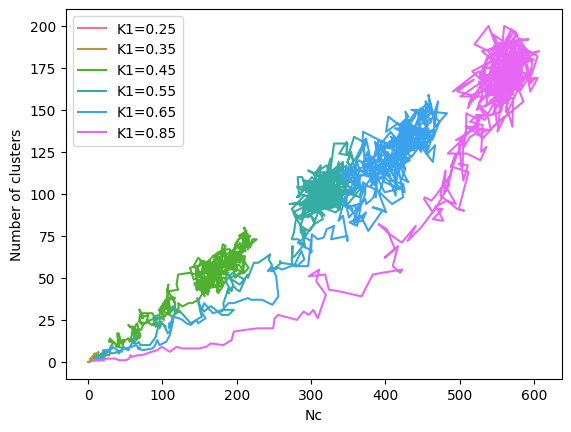

In [61]:
# Nc_histories = [[history[g]['Nc'] for g in range(GENERATIONS)] for history in K1_history_data]

# K1  = [i for i in K1_values]
# palette = sns.color_palette('husl', len(K1))

# for i,(history, cluster) in enumerate(zip(Nc_histories, K1_clusters_data)):
#     plt.plot(history,cluster, color=palette[i], label=f'K1={K1_values[i]}')
#     plt.legend()
#     plt.xlabel('Nc')
#     plt.ylabel('Number of clusters')

In [121]:
#HEREEE!!!

In [89]:
GENERATIONS = 500
ROWS = COLS = 101
ORIGIN = (COLS // 2, ROWS // 2)
PHI = 1000
CANCER_INIT_POSITIONS = [(ORIGIN[0], ORIGIN[1]), (ORIGIN[0] + 1, ORIGIN[1]), 
                         (ORIGIN[0] - 1, ORIGIN[1]), (ORIGIN[0], ORIGIN[1] - 1), 
                         (ORIGIN[0], ORIGIN[1] + 1)]
K3, K4 = 0.4, 0.4
RHO = 3.85

NO_TIME_DELAY = 0

# K1_values=np.arange(0.25, 0.9, 0.01)

K1_values = [0.2, 0.25, 0.35, 0.45, 0.55, 0.65, 0.85, 0.9]
K2_values = [0.2, 0.225, 0.25, 0.275, 0.3, 0.35, 0.375, 0.4]







In [90]:

K1_clusters_data = []
K1_history_data = []

generation_above_50cluster_k2s = []

for K2 in K2_values:
    # Store the generation at which clusters go above 50 for each K1
    generation_above_50 = []

    # Reset K1_clusters_data and K1_history_data for each K2 iteration
    K1_clusters = []
    K1_history = []

    for K1 in K1_values:
        history, Ms = ca.simulate_tumor_growth_with_clusters(NO_TIME_DELAY, GENERATIONS, ROWS, COLS, PHI, RHO, K1, K2, K3, K4, CANCER_INIT_POSITIONS, ORIGIN)
        indiv_clusters = [len(ca.find_clusters(M, ROWS, COLS)) for M in Ms]
        K1_clusters.append(indiv_clusters)
        K1_history.append(history)

        # Find the generation at which clusters exceed 50
        generation_above_50.append(next((gen for gen, clusters in enumerate(indiv_clusters, start=1) if clusters > 50), None))

    generation_above_50cluster_k2s.append(generation_above_50)
    K1_clusters_data.append(K1_clusters)
    K1_history_data.append(K1_history)

    plt.figure(figsize=(10, 6))

    # for i, tau_cluster in enumerate(K1_clusters_data):
    #     plt.plot(range(1, GENERATIONS + 1), tau_cluster, label=f'k1 = {K1_values[i]}, tau = {NO_TIME_DELAY}', linestyle='solid')

    # Add a vertical line at the generation when clusters exceed 50 for each K1
    # for K1, generation in zip(K1_values, generation_above_50):
    #     if generation:
    #         plt.axvline(x=generation, color='red', linestyle='dashed', label=f'Clusters > 50 for k1={K1}')

    # plt.xlabel('Generation')
    # plt.ylabel('Number of Clusters')
    # plt.legend()
    # plt.show()



<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [161]:
#Change to 0 those none values inside every array inside the array generation_above_50_k2s
# generation_above_50cluster_k2s_new = []
# for data in generation_above_50cluster_k2s:
#     generation_above_50_cluster = [10000 if value is None else value for value in data]
#     generation_above_50cluster_k2s_new.append(generation_above_50_cluster)


# # time_array = np.array(generation_above_50cluster_k2s_new)

# time_array=np.array(generation_above_50cluster_k2s)

In [91]:
# Keep NONE values as they are when number of cluster does not exceed 50
time_array=np.array(generation_above_50cluster_k2s)
print(time_array)

[[None None None 80 63 59 80 50]
 [None None None 138 78 67 53 49]
 [None None None 177 107 62 51 46]
 [None None None None 85 69 46 49]
 [None None None None 100 69 51 51]
 [None None None None 96 61 51 53]
 [None None None None 311 66 47 43]
 [None None None None 133 81 52 46]]


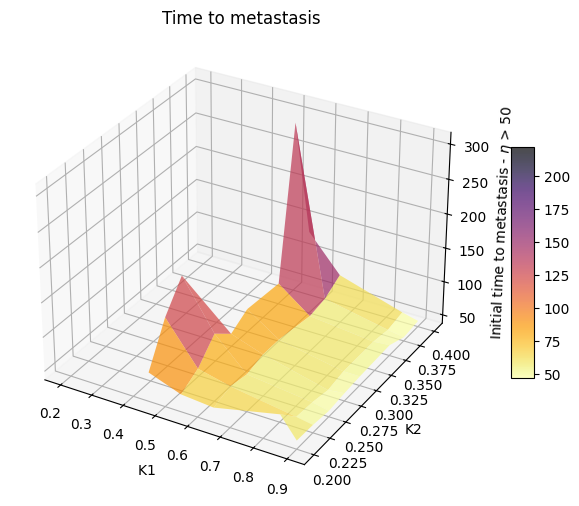

In [92]:
K1_array, K2_array = np.meshgrid(K1_values, K2_values)
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot surface
# surf = ax.plot_surface(K1_array, K2_array, time_array, cmap='inferno_r', edgecolor='k', alpha=0.7)
surf = ax.plot_surface(K1_array, K2_array, time_array, cmap='inferno_r', alpha=0.7)

# Add labels and title
ax.set_xlabel('K1 ')
ax.set_ylabel('K2')
ax.set_zlabel(r'Initial time to metastasis - $\eta$ > 50', rotation=90)
ax.set_title('Time to metastasis')

# Add colorbar
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)

plt.show()

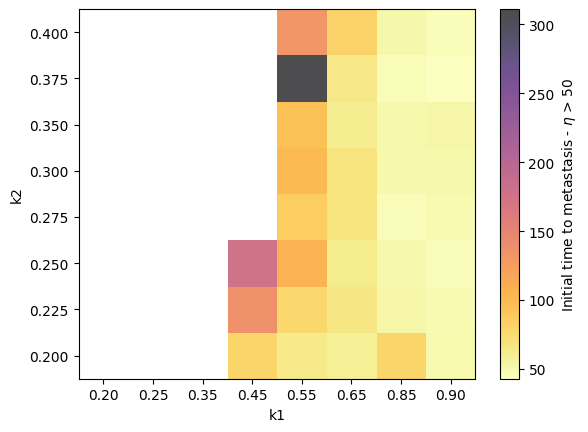

In [96]:
import matplotlib.pyplot as plt
import numpy as np



# Convert None values to NaN for handling
time_array = np.array([[float(entry) if entry is not None else np.nan for entry in row] for row in time_array])

# Your custom K1_values and K2_values
K1_values = [0.2, 0.25, 0.35, 0.45, 0.55, 0.65, 0.85, 0.9]
K2_values = [0.2, 0.225, 0.25, 0.275, 0.3, 0.35, 0.375, 0.4]

# Plotting
fig, ax = plt.subplots()
im = ax.imshow(time_array, cmap='inferno_r', interpolation='none', aspect='auto', origin='lower', alpha=0.7)

# Customize tick positions and labels
ax.set_xticks(np.arange(len(K1_values)))
ax.set_yticks(np.arange(len(K2_values)))
ax.set_xticklabels([f'{k1:.2f}' for k1 in K1_values])
ax.set_yticklabels([f'{k2:.3f}' for k2 in K2_values])

# Add colorbar
cbar = plt.colorbar(im, ax=ax)
cbar.set_label(r'Initial time to metastasis - $\eta$ > 50')

# Set axis labels
ax.set_xlabel('k1')
ax.set_ylabel('k2')

plt.show()


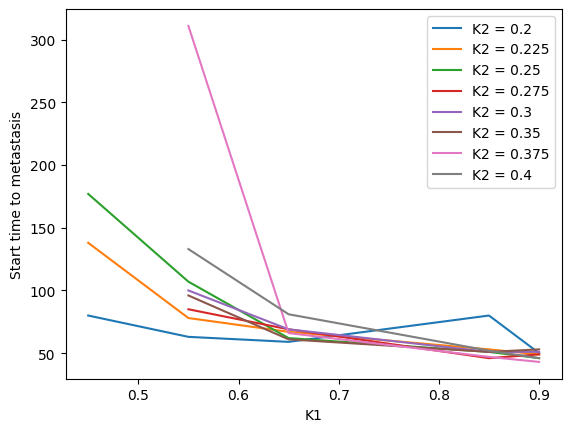

In [97]:

for z, data in enumerate(time_array):
    plt.plot(K1_values, data, linestyle='solid', label=f'K2 = {K2_values[z]}')
    plt.xlabel('K1')
    plt.ylabel('Start time to metastasis')
    plt.legend()





In [282]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

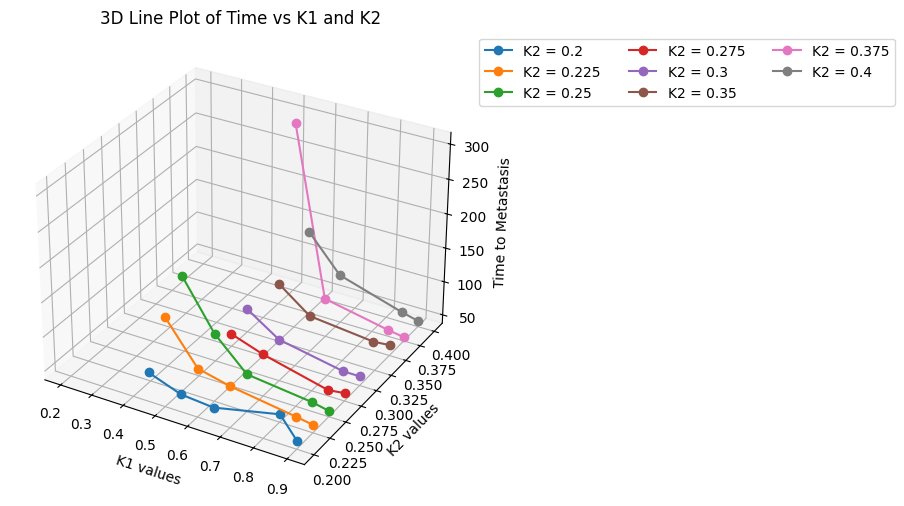

In [95]:

# Convert data to a numpy array for better manipulation

K1_array, K2_array = np.meshgrid(K1_values, K2_values)


fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot lines with swapped axes
for i in range(len(K2_values)):
    ax.plot(K1_values, np.ones_like(K1_values) * K2_values[i], time_array[i, :], marker='o', label=f'K2 = {K2_values[i]}')

# Add labels and title
ax.set_xlabel('K1 values')
ax.set_ylabel('K2 values')
ax.set_zlabel('Time to Metastasis')
ax.set_title('3D Line Plot of Time vs K1 and K2')

# Add legend
ax.legend(loc='upper left', ncol=3, bbox_to_anchor=(1, 1))

plt.show()



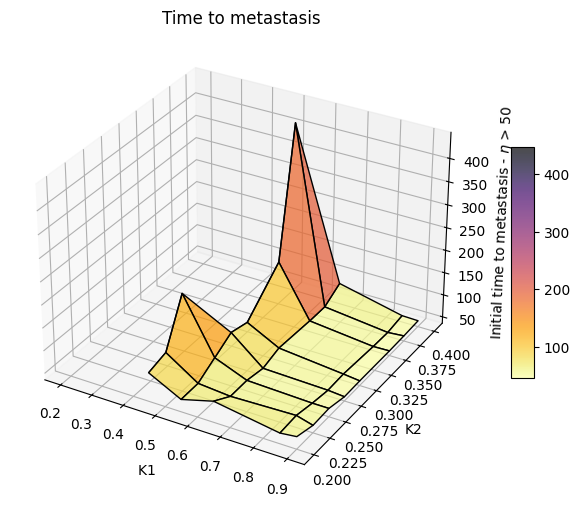

In [300]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot surface
surf = ax.plot_surface(K1_array, K2_array, time_array, cmap='inferno_r', edgecolor='k', alpha=0.7)

# Add labels and title
ax.set_xlabel('K1 ')
ax.set_ylabel('K2')
ax.set_zlabel(r'Initial time to metastasis - $\eta$ > 50', rotation=90)
ax.set_title('Time to metastasis')

# Add colorbar
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)

plt.show()

Clusters > 50 for (K1=0.45, K2=0.2) at generation 99
Clusters > 50 for (K1=0.55, K2=0.2) at generation 63
Clusters > 50 for (K1=0.65, K2=0.2) at generation 82
Clusters > 50 for (K1=0.85, K2=0.2) at generation 59
Clusters > 50 for (K1=0.9, K2=0.2) at generation 63
Clusters > 50 for (K1=0.45, K2=0.225) at generation 110
Clusters > 50 for (K1=0.55, K2=0.225) at generation 64
Clusters > 50 for (K1=0.65, K2=0.225) at generation 58
Clusters > 50 for (K1=0.85, K2=0.225) at generation 62
Clusters > 50 for (K1=0.9, K2=0.225) at generation 52
Clusters > 50 for (K1=0.45, K2=0.25) at generation 207
Clusters > 50 for (K1=0.55, K2=0.25) at generation 87
Clusters > 50 for (K1=0.65, K2=0.25) at generation 59
Clusters > 50 for (K1=0.85, K2=0.25) at generation 54
Clusters > 50 for (K1=0.9, K2=0.25) at generation 54
Clusters > 50 for (K1=0.55, K2=0.275) at generation 110
Clusters > 50 for (K1=0.65, K2=0.275) at generation 52
Clusters > 50 for (K1=0.85, K2=0.275) at generation 48
Clusters > 50 for (K1=0.9

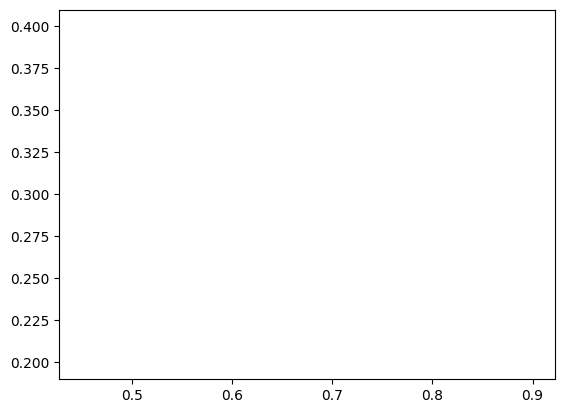

In [301]:
# Iterate through the generated data
for i, K2 in enumerate(K2_values):
    for j, generation_above_50 in enumerate(generation_above_50cluster_k2s[i]):
        # Check if clusters exceed 50
        if generation_above_50:
            # Extract the corresponding K1 and K2 values
            k1_value = K1_values[j]
            k2_value = K2_values[i]

            # Print or store the (k1, k2) pair
            print(f'Clusters > 50 for (K1={k1_value}, K2={k2_value}) at generation {generation_above_50}')
        plt.plot(k1_value, k2_value, color='red', linestyle='solid')

In [3]:
GENERATIONS = 500
ROWS = COLS = 101
ORIGIN = (COLS // 2, ROWS // 2)
PHI = 1000
CANCER_INIT_POSITIONS = [(ORIGIN[0], ORIGIN[1]), (ORIGIN[0] + 1, ORIGIN[1]), 
                         (ORIGIN[0] - 1, ORIGIN[1]), (ORIGIN[0], ORIGIN[1] - 1), 
                         (ORIGIN[0], ORIGIN[1] + 1)]
K3, K4 = 0.4, 0.4
RHO = 3.85

NO_TIME_DELAY = 0


K1_values = [0.2, 0.9]
K2_values = [0.2, 0.4]


# step = 0.1

# current_value = K1_values[0]

# while current_value <= K1_values[1]:
#     print(current_value)
#     current_value += step

In [4]:
K1_values = [0.2, 0.9]
K2_values = [0.2, 0.4]

# K1_clusters_data = []
# K1_history_data = []
generation_above_50cluster_k2s = []
pairs_above_50 = []  # List to store pairs of (k1, k2) where clusters go above 50

# Iterate over K2 values

step_k2 = 0.01
current_value_k2 = K2_values[0]
while current_value_k2 <= K2_values[1]:
    current_value_k2 += step_k2
  
    K1_clusters = []
    K1_history = []
    generation_above_50 = []

    # Iterate over K1 values until the cluster goes above 50
    step_k1 = 0.1
    current_value_k1 = K1_values[0]
    while current_value_k1 <= K1_values[1]:
        current_value_k1 += step_k1
        history, Ms = ca.simulate_tumor_growth_with_clusters(NO_TIME_DELAY, GENERATIONS, ROWS, COLS, PHI, RHO, current_value_k1, current_value_k2, K3, K4, CANCER_INIT_POSITIONS, ORIGIN)
        indiv_clusters = [len(ca.find_clusters(M, ROWS, COLS)) for M in Ms]
        K1_clusters.append(indiv_clusters)
        # K1_history.append(history)

        # Find the generation at which clusters exceed 50
        generation_above_50_value = next((gen for gen, clusters in enumerate(indiv_clusters, start=1) if clusters > 50), None)
        generation_above_50.append(generation_above_50_value)

        # If clusters go above 50, store the pair (k1, k2)
        if generation_above_50_value:
            pairs_above_50.append((current_value_k1, current_value_k2))
            break

    generation_above_50cluster_k2s.append(generation_above_50)
    # K1_clusters_data.append(K1_clusters)
    # K1_history_data.append(K1_history)

# Print the pairs of (k1, k2) where clusters go above 50
print("Pairs where clusters go above 50:", pairs_above_50)

  


Pairs where clusters go above 50: [(0.4, 0.21000000000000002), (0.4, 0.22000000000000003), (0.5, 0.23000000000000004), (0.5, 0.24000000000000005), (0.5, 0.25000000000000006), (0.5, 0.26000000000000006), (0.5, 0.2700000000000001), (0.5, 0.2800000000000001), (0.5, 0.2900000000000001), (0.5, 0.3000000000000001), (0.5, 0.3100000000000001), (0.6, 0.3200000000000001), (0.5, 0.3300000000000001), (0.5, 0.34000000000000014), (0.5, 0.35000000000000014), (0.6, 0.36000000000000015), (0.6, 0.37000000000000016), (0.7, 0.38000000000000017), (0.6, 0.3900000000000002), (0.6, 0.4000000000000002)]


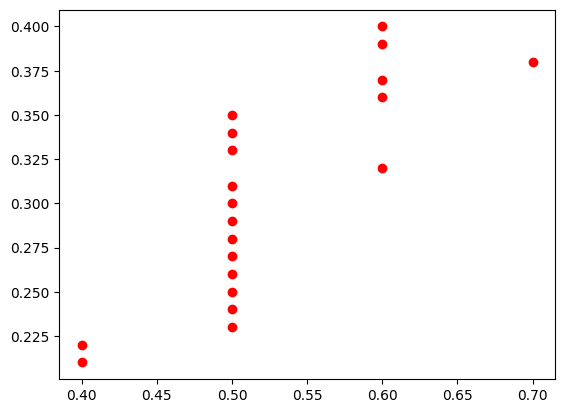

In [5]:
#plot the pairs in pairs_above_50
for pair in pairs_above_50:
    plt.plot(pair[0], pair[1], color='red', marker='o', linestyle='solid')

In [6]:
# clusters_above_50_pairs = []

# for K2 in K2_values:
#     # Reset K1_clusters_data and K1_history_data for each K2 iteration
#     K1_clusters = []
#     K1_history = []

#     for K1 in K1_values:
#         history, Ms = ca.simulate_tumor_growth_with_clusters(NO_TIME_DELAY, GENERATIONS, ROWS, COLS, PHI, RHO, K1, K2, K3, K4, CANCER_INIT_POSITIONS, ORIGIN)
#         indiv_clusters = [len(ca.find_clusters(M, ROWS, COLS)) for M in Ms]
#         K1_clusters.append(indiv_clusters)

#         # Find the generation at which clusters exceed 50
#         generation_above_50 = next((gen for gen, clusters in enumerate(indiv_clusters, start=1) if clusters > 50), None)

#         if generation_above_50 is not None:
#             # If clusters exceed 50, store the pair (k1, k2)
#             clusters_above_50_pairs.append((K1, K2))

#         K1_history.append(history)

#     # You can plot K1_clusters or K1_history if needed for analysis

# # Plot the pairs of (k1, k2) when clusters exceed 50
# pairs_array = np.array(clusters_above_50_pairs)
# plt.scatter(pairs_array[:, 0], pairs_array[:, 1], color='red', label='Clusters > 50')
# plt.xlabel('K1 values')
# plt.ylabel('K2 values')
# plt.title('Pairs of (K1, K2) when Clusters > 50')
# plt.legend()
# plt.show()

In [9]:
GENERATIONS = 500
ROWS = COLS = 101
ORIGIN = (COLS // 2, ROWS // 2)
PHI = 1000
CANCER_INIT_POSITIONS = [(ORIGIN[0], ORIGIN[1]), (ORIGIN[0] + 1, ORIGIN[1]), 
                         (ORIGIN[0] - 1, ORIGIN[1]), (ORIGIN[0], ORIGIN[1] - 1), 
                         (ORIGIN[0], ORIGIN[1] + 1)]
K3, K4 = 0.4, 0.4
RHO = 3.85

NO_TIME_DELAY = 0

# K1_values=np.arange(0.25, 0.9, 0.01)

K1_values = [0.2, 0.25, 0.35, 0.45, 0.55, 0.65, 0.85, 0.9]
K2_values = [0.2, 0.225, 0.25, 0.275, 0.3, 0.35, 0.375, 0.4]

In [62]:
K1_history_data = []
generation_above_50cluster_k2s = []
pairs_above_50 = []


for K2 in reversed(K2_values):
    # Store the generation at which clusters go above 50 for each K1
    generation_above_50 = []

    # Reset K1_clusters_data and K1_history_data for each K2 iteration
    # K1_clusters = []
    # K1_history = []

    for K1 in K1_values:
        history, Ms = ca.simulate_tumor_growth_with_clusters(NO_TIME_DELAY, GENERATIONS, ROWS, COLS, PHI, RHO, K1, K2, K3, K4, CANCER_INIT_POSITIONS, ORIGIN)
        indiv_clusters = [len(ca.find_clusters(M, ROWS, COLS)) for M in Ms]
        # K1_clusters.append(indiv_clusters)
        # K1_history.append(history)

        # Find the generation at which clusters exceed 50
        generation_above_50_value = next((gen for gen, clusters in enumerate(indiv_clusters, start=1) if clusters > 50), None)
        # generation_above_50.append(generation_above_50_value)

        if generation_above_50_value:
            pairs_above_50.append((K1, K2))
            break
     
    # generation_above_50cluster_k2s.append(generation_above_50)
    # K1_clusters_data.append(K1_clusters)
    # K1_history_data.append(K1_history)


# Print the pairs of (k1, k2) where clusters go above 50
print("Pairs where clusters go above 50:", pairs_above_50)




Pairs where clusters go above 50: [(0.65, 0.4), (0.65, 0.375), (0.55, 0.35), (0.55, 0.3), (0.45, 0.275), (0.45, 0.25), (0.45, 0.225), (0.45, 0.2)]


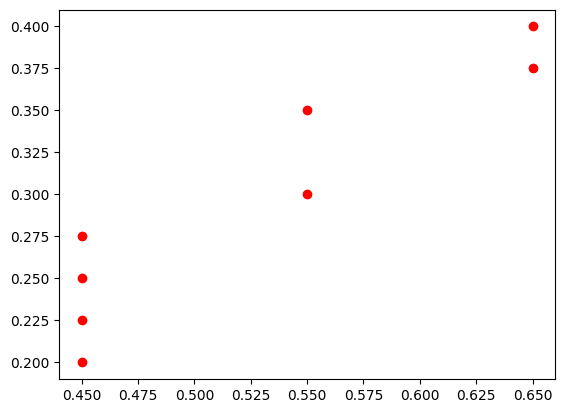

In [63]:
#plot the pairs in pairs_above_50
for pair in pairs_above_50:
    plt.plot(pair[0], pair[1], color='red', marker='o', linestyle='solid')

In [19]:

# K2_values = [0.2, 0.4]

# step = 0.1
# current_value = K2_values[1]

# while current_value >= K2_values[0]:
#     print(current_value)
#     current_value -= step


K2_values = [0.2, 0.225, 0.25, 0.275, 0.3, 0.35, 0.375, 0.4]

for current_value in reversed(K2_values):
    print(current_value)

0.4
0.375
0.35
0.3
0.275
0.25
0.225
0.2
